- [From Conway to Lenia - Notebook](https://colab.research.google.com/github/OpenLenia/Lenia-Tutorial/blob/main/Tutorial_From_Conway_to_Lenia.ipynb#scrollTo=VAt144SoGZZr)

- [NCA Impl - Notebook](https://github.com/Mayukhdeb/differentiable-morphogenesis/blob/main/notebooks/basic_walkthrough.ipynb)

- [ALIFE2023: Flow-Lenia](https://www.youtube.com/watch?v=605DcOMwFLM)

- [Play animation widget](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#play-animation-widget)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from aesthetic_tensor import aesthetify
from tqdm.auto import tqdm
import nca.vis as vis

/Users/izmac/Library/Caches/pypoetry/virtualenvs/nca-Dr2PtgJ1-py3.9/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
aesthetify()

In [4]:
from nca.models import FCInvAE

In [149]:
model = FCInvAE(msg_size=16, frame_size=32, lr=0.002)

In [150]:
out = model(2, 0)
# {k: v.shape for k, v in out.items()}
# model.render_out(out)

In [151]:
example_msg = model.sample_msg(3)

In [152]:
hist = []

In [153]:
%config InlineBackend.figure_formats = ['svg']

In [154]:
@vis.display_generator_decorator(sleep=2)
def display_hist():
    while True:
        out = model.forward_msg(example_msg, noise_size=0)
        img = out["image"].ae.N.zoom(4)[0].cmap().img
        yield [img, out["image"].max(), out["image"].min()]

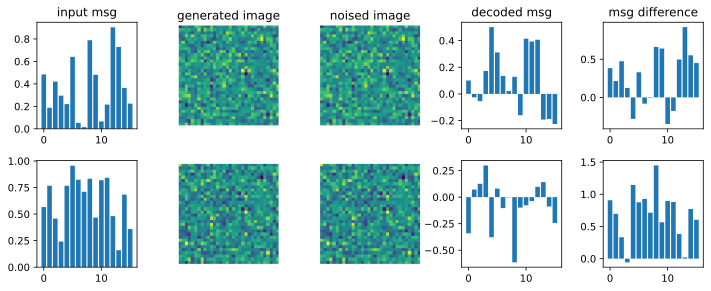

In [155]:
out = model(2, 0)
model.render_out(out, size=2)

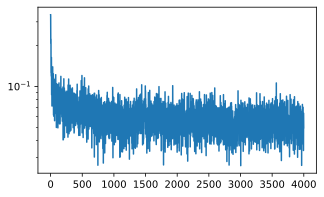

In [156]:
@vis.display_generator_decorator(sleep=2)
def display_hist():
    while True:
        fig, ax = plt.subplots(figsize=(5, 3))
        ax.plot(hist)
        plt.yscale('log')
        plt.close()
        yield fig

In [157]:
outs = []
@vis.display_generator_decorator()
def display_hist():
    for i in tqdm(range(4000)):
        loss, out = model.optim_step(3, 0)
        hist.append(loss)
        if i % 10 == 0:
            out = model.forward_msg(example_msg, noise_size=1)
            outs.append(out)
        yield None

None

  0%|          | 0/4000 [00:00<?, ?it/s]

In [158]:
vis.stop_all_display_threads()

In [159]:
import threading
threading.enumerate(), threading.active_count()

([<_MainThread(MainThread, started 140704612227968)>,
  <Thread(IOPub, started daemon 123145383956480)>,
  <Heartbeat(Heartbeat, started daemon 123145400745984)>,
  <Thread(Thread-3, started daemon 123145418608640)>,
  <Thread(Thread-4, started daemon 123145435398144)>,
  <ParentPollerUnix(Thread-2, started daemon 123145486303232)>,
  <TMonitor(Thread-8, started daemon 123145678585856)>,
  <GarbageCollectorThread(Thread-13, started daemon 123145658040320)>,
  <Thread(Thread-51, started daemon 123145455943680)>,
  <Thread(Thread-52, started daemon 123145565655040)>,
  <Thread(Thread-54, started daemon 123145641250816)>,
  <Thread(Thread-55, started daemon 123145754181632)>,
  <Thread(Thread-56, started daemon 123145821376512)>],
 13)